# Mapa do resultado do 2º Turno das Eleições Presidenciais de 2018 por Município - PANDAS

In [1]:
# Importando as bibliotecas
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
# Caminho para o arquivo Shapefile 
caminho_shapefile = r'D:\Usuários\Downloads\br_municipios\BRMUE250GC_SIR.shp'

# Ler o Shapefile
df_mapa = gpd.read_file(caminho_shapefile)

# Exibir as primeiras linhas
df_mapa.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.3199 -1.7557..."
1,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034..."
2,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.1423 -18.29672, -51.14236 -18.29..."
3,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.2327, -51.69957 -16.23..."
4,CURUÁ,1502855,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731..."


In [3]:
# Verificando tamanho e colunas
df_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  5572 non-null   object  
 1   CD_GEOCMU   5572 non-null   object  
 2   geometry    5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


<Axes: >

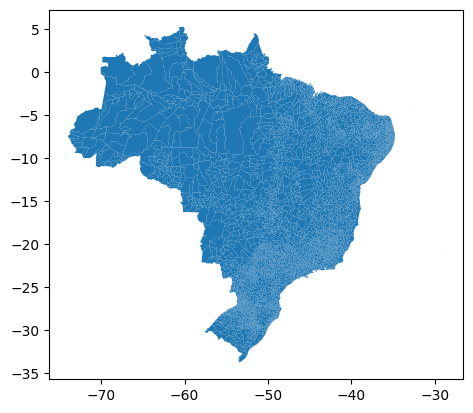

In [4]:
# Vamos exibir o mapa (plotar o shapefile)
df_mapa.plot()

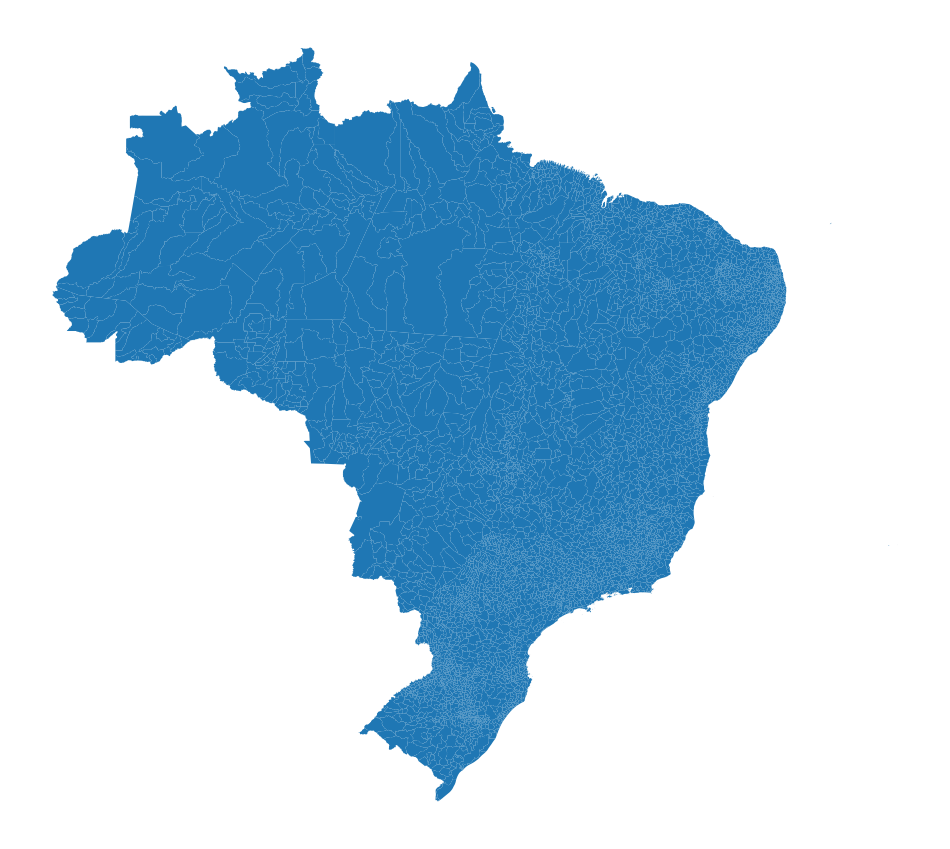

In [5]:
# Vamos expandir o espaço para desenhar o mapa
fig, ax = plt.subplots(1, figsize=(12,12))

# desenhar o mapa
df_mapa.plot(ax=ax)

# tirar os eixos
ax.set_axis_off()

plt.show()

In [6]:
# Vamos carregar o arquivo com o resultado da eleição no Brasil dividido por municipio/zona
df_votacao = pd.read_csv(r'D:\\Usuários\\Downloads\\votacao_candidato_munzona_2018_BRASIL.csv',
                        sep=';', encoding='latin1')

In [7]:
print(f"O número de linhas no DataFrame é: {len(df_votacao['QT_VOTOS_NOMINAIS'])}")

O número de linhas no DataFrame é: 8680108


In [8]:
# Visualizando o dataframe transposto
df_votacao.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,13/11/2024,10:56:11,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,#NULO#,250000050143,PARTIDO ISOLADO,SOLIDARIEDADE,N,67,Válido,67,3,ELEITO POR MÉDIA
1,13/11/2024,10:56:11,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,#NULO#,250000050143,PARTIDO ISOLADO,SOLIDARIEDADE,N,15,Válido,15,3,ELEITO POR MÉDIA
2,13/11/2024,10:56:11,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,#NULO#,250000050143,PARTIDO ISOLADO,SOLIDARIEDADE,N,215,Válido,215,3,ELEITO POR MÉDIA
3,13/11/2024,10:56:11,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,#NULO#,250000050143,PARTIDO ISOLADO,SOLIDARIEDADE,N,12,Válido,12,3,ELEITO POR MÉDIA
4,13/11/2024,10:56:11,2018,2,Eleição Ordinária,1,297,ELEIÇÕES GERAIS ESTADUAIS 2018,07/10/2018,E,...,#NULO#,250000050143,PARTIDO ISOLADO,SOLIDARIEDADE,N,6,Válido,6,3,ELEITO POR MÉDIA


In [9]:
# Separar os dados pois precisamos apenas dos dados de 2 Turno
df_votacao = df_votacao[df_votacao['NR_TURNO'] == 2]
#df_votacao.sample(3).T #solução com pandas.
print(df_votacao.sample(3))

         DT_GERACAO HH_GERACAO  ANO_ELEICAO  CD_TIPO_ELEICAO  \
8053510  13/11/2024   10:56:11         2018                2   
7901148  13/11/2024   10:56:11         2018                2   
8091869  13/11/2024   10:56:11         2018                2   

           NM_TIPO_ELEICAO  NR_TURNO  CD_ELEICAO  \
8053510  Eleição Ordinária         2         296   
7901148  Eleição Ordinária         2         296   
8091869  Eleição Ordinária         2         298   

                             DS_ELEICAO  DT_ELEICAO TP_ABRANGENCIA  ...  \
8053510      ELEIÇÃO GERAL FEDERAL 2018  28/10/2018              F  ...   
7901148      ELEIÇÃO GERAL FEDERAL 2018  28/10/2018              F  ...   
8091869  ELEIÇÕES GERAIS ESTADUAIS 2018  28/10/2018              E  ...   

        DS_COMPOSICAO_FEDERACAO  SQ_COLIGACAO  \
8053510                  #NULO#  280000050703   
7901148                  #NULO#  280000050386   
8091869                  #NULO#  250000050400   

                                    

In [10]:
# Vamos verificar quantos municipios unicos existem no conjunto de dados
# Vamos pegar por codigo do municipio
df_votacao['CD_MUNICIPIO'].nunique()

5708

In [11]:
# Mas o Brasil tem 5570 municipios
# Vamos verificar algumas cidades fora do Brasil
#df_votacao[df_votacao['SG_UF'] == 'ZZ'].sample(4).T  ##solução com pandas
df_votacao[df_votacao['SG_UF'] == 'ZZ']

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
7232535,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,N,0,Válido,0,4,NÃO ELEITO
7863236,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,11,Válido,11,1,ELEITO
7863237,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,10,Válido,10,1,ELEITO
7863238,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,55,Válido,55,1,ELEITO
7863239,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,103,Válido,103,1,ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059852,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,N,2953,Válido,2953,4,NÃO ELEITO
8060748,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,N,1327,Válido,1327,4,NÃO ELEITO
8061370,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,N,420,Válido,420,4,NÃO ELEITO
8061371,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050703,O POVO FELIZ DE NOVO,PT / PC do B / PROS,N,151,Válido,151,4,NÃO ELEITO


In [12]:
# Quantas cidades fora do Brasil estão no conjunto de dados?
df_votacao[df_votacao['SG_UF'] == 'ZZ']['CD_MUNICIPIO'].nunique()

138

In [13]:
# Vamos eliminar os municpios de fora do Brasil
df_votacao = df_votacao[df_votacao['SG_UF'] != 'ZZ']

In [14]:
# Verificando a quantidade de municpios
df_votacao['CD_MUNICIPIO'].nunique()

5570

In [15]:
# Os dados estão separados por municipio/zona
# Municipios pequenos normalmente tem apenas 1 zona eleitoral
# mas municipios maiores podem ter várias zonas eleitorias

# Vamos verificar Belo Horizonte
df_votacao[df_votacao['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA,...,DS_COMPOSICAO_FEDERACAO,SQ_COLIGACAO,NM_COLIGACAO,DS_COMPOSICAO_COLIGACAO,ST_VOTO_EM_TRANSITO,QT_VOTOS_NOMINAIS,NM_TIPO_DESTINACAO_VOTOS,QT_VOTOS_NOMINAIS_VALIDOS,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
7892473,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,55333,Válido,55333,1,ELEITO
7893064,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,44233,Válido,44233,1,ELEITO
7893356,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,59381,Válido,59381,1,ELEITO
7894240,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,44471,Válido,44471,1,ELEITO
7894263,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,296,ELEIÇÃO GERAL FEDERAL 2018,28/10/2018,F,...,#NULO#,280000050386,"BRASIL ACIMA DE TUDO, DEUS ACIMA DE TODOS",PSL / PRTB,N,43886,Válido,43886,1,ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8102178,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,28/10/2018,E,...,#NULO#,130000050129,RECONSTRUIR MINAS,PSDB / PSD / SOLIDARIEDADE / PTB / PPS / PMN /...,N,28017,Válido,28017,4,NÃO ELEITO
8102454,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,28/10/2018,E,...,#NULO#,130000050129,RECONSTRUIR MINAS,PSDB / PSD / SOLIDARIEDADE / PTB / PPS / PMN /...,N,26207,Válido,26207,4,NÃO ELEITO
8102458,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,28/10/2018,E,...,#NULO#,130000050129,RECONSTRUIR MINAS,PSDB / PSD / SOLIDARIEDADE / PTB / PPS / PMN /...,N,36485,Válido,36485,4,NÃO ELEITO
8102460,13/11/2024,10:56:11,2018,2,Eleição Ordinária,2,298,ELEIÇÕES GERAIS ESTADUAIS 2018,28/10/2018,E,...,#NULO#,130000050129,RECONSTRUIR MINAS,PSDB / PSD / SOLIDARIEDADE / PTB / PPS / PMN /...,N,23187,Válido,23187,4,NÃO ELEITO


In [16]:
# Eliminar algumas colunas do dataframe que não serão utilizadas
df_votacao = df_votacao[['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO',
                        'NM_URNA_CANDIDATO', 'QT_VOTOS_NOMINAIS']]

df_votacao.head()

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
7862039,RS,89141,CAPÃO DO CIPÓ,17,JAIR BOLSONARO,943
7862040,RS,85707,SEDE NOVA,17,JAIR BOLSONARO,1015
7862041,RS,88935,SÃO SEBASTIÃO DO CAÍ,17,JAIR BOLSONARO,8758
7862042,RS,87378,MARAU,17,JAIR BOLSONARO,17922
7862043,RS,86010,CERRO LARGO,17,JAIR BOLSONARO,4149


In [17]:
# Precisamos agregar os dados por municipio e candidato
df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum()

QT_VOTOS_NOMINAIS
SG_UF CD_MUNICIPIO NM_MUNICIPIO           NR_CANDIDATO NM_URNA_CANDIDATO                   
AC    1007         BUJARI                 13           FERNANDO HADDAD                 1274
                                          17           JAIR BOLSONARO                  4676
      1015         CAPIXABA               13           FERNANDO HADDAD                 1086
                                          17           JAIR BOLSONARO                  3895
      1023         PORTO ACRE             13           FERNANDO HADDAD                 2059
...                                                                                     ...
TO    96954        ALIANÇA DO TOCANTINS   17           JAIR BOLSONARO                  1215
      96970        APARECIDA DO RIO NEGRO 13           FERNANDO HADDAD                 1291
                                          17           JAIR BOLSONARO                  1171
      96997        BARROLÂNDIA            13           FERNANDO HADDAD                 1545
                                          17           JAIR BOLSONARO                  1501

[17126 rows x 1 columns]

In [18]:
# Fazer o groupby, reindexar o indice, vai salvar isso em um dataframe
df_votacao = df_votacao.groupby(['SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_CANDIDATO', 'NM_URNA_CANDIDATO']).sum().reset_index()

df_votacao.sample(4)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
531,AP,6084,PEDRA BRANCA DO AMAPARI,40,CAPI 40,2979
2737,MA,8621,VILA NOVA DOS MARTÍRIOS,17,JAIR BOLSONARO,1650
14583,SP,61786,BOM SUCESSO DE ITARARÉ,45,JOÃO DORIA,957
13184,SC,80993,DONA EMMA,13,FERNANDO HADDAD,639


In [19]:
# Vamos verificar novamente a cidade de Belo Horizonte
df_votacao[df_votacao['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
3340,MG,41238,BELO HORIZONTE,13,FERNANDO HADDAD,472887
3341,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513
3342,MG,41238,BELO HORIZONTE,30,ROMEU ZEMA,773454
3343,MG,41238,BELO HORIZONTE,45,ANTONIO ANASTASIA,537931


In [20]:
# Filtrar o DataFrame onde NR_CANDIDATO é 13 ou 17
df_filtrado = df_votacao.loc[df_votacao['NR_CANDIDATO'].isin([13, 17])]
df_filtrado_final = df_filtrado.copy()

# Exibir as primeiras linhas do DataFrame filtrado
print(df_filtrado.head(50).T)

                                0               1                2   \
SG_UF                           AC              AC               AC   
CD_MUNICIPIO                  1007            1007             1015   
NM_MUNICIPIO                BUJARI          BUJARI         CAPIXABA   
NR_CANDIDATO                    13              17               13   
NM_URNA_CANDIDATO  FERNANDO HADDAD  JAIR BOLSONARO  FERNANDO HADDAD   
QT_VOTOS_NOMINAIS             1274            4676             1086   

                               3                4               5   \
SG_UF                          AC               AC              AC   
CD_MUNICIPIO                 1015             1023            1023   
NM_MUNICIPIO             CAPIXABA       PORTO ACRE      PORTO ACRE   
NR_CANDIDATO                   17               13              17   
NM_URNA_CANDIDATO  JAIR BOLSONARO  FERNANDO HADDAD  JAIR BOLSONARO   
QT_VOTOS_NOMINAIS            3895             2059            7150   

           

In [21]:
# Ordenar o dataframe pela quantidade de votos e depois deixar apenas o primeiro
# registro de cada municipio
df_filtrado_final.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False).head(50)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
16569,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834
16568,SP,71072,SÃO PAULO,13,FERNANDO HADDAD,2424125
9861,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896
9860,RJ,60011,RIO DE JANEIRO,13,FERNANDO HADDAD,1105393
1764,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411
1210,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532
3341,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513
8969,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377
1532,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265
370,AM,2550,MANAUS,17,JAIR BOLSONARO,686999


In [22]:
# Vamos ordenar
df_filtrado_final.sort_values(by='QT_VOTOS_NOMINAIS', ascending=False, inplace=True)

# dropar as linhas duplicadas, mantendo a primeira
df_filtrado_final.drop_duplicates(subset='CD_MUNICIPIO', keep='first', inplace=True)

df_filtrado_final.head(50)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
16569,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834
9861,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896
1764,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411
1210,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532
3341,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513
8969,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377
1532,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265
370,AM,2550,MANAUS,17,JAIR BOLSONARO,686999
2171,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,528525
8144,PE,25313,RECIFE,13,FERNANDO HADDAD,482673


In [23]:
# Vamos verificar novamente a cidade de Belo Horizonte
df_filtrado_final[df_filtrado_final['NM_MUNICIPIO'] == 'BELO HORIZONTE']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS
3341,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513


In [24]:
# Agora vamos criar uma coluna representando o resultado da eleição naquele municipio
# sendo que o Resultado é True se o candidato Bolsonaro venceu naquele municipio
# e False em caso contrário
df_filtrado_final['RESULTADO'] = df_filtrado_final['NR_CANDIDATO'].apply(lambda x: x == 17)

In [25]:
# Verificando o resultado
df_filtrado_final.head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
16569,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834,True
9861,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896,True
1764,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411,True
1210,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532,False
3341,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513,True
8969,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377,True
1532,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265,False
370,AM,2550,MANAUS,17,JAIR BOLSONARO,686999,True
2171,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,528525,True
8144,PE,25313,RECIFE,13,FERNANDO HADDAD,482673,False


In [26]:
# Mostrando alguns valores do dataframe do geopandas
df_mapa.sample(3)

,NM_MUNICIP,CD_GEOCMU,geometry
1656,SERAFINA CORRÊA,4320404,"POLYGON ((-51.98589 -28.71504, -51.98563 -28.7..."
359,SANDOVALINA,3545506,"POLYGON ((-51.87877 -22.42531, -51.87832 -22.4..."
2728,QUIXABEIRA,2925931,"POLYGON ((-40.19036 -11.42826, -40.19036 -11.4..."


In [27]:
# tentando encontrar o municipio pelo código
df_filtrado_final[df_filtrado_final['CD_MUNICIPIO'] == 17698]

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
10266,RN,17698,OURO BRANCO,13,FERNANDO HADDAD,2463,False


In [28]:
# Porque não podemos usar o nome do municipio para juntar
df_filtrado_final[df_filtrado_final['NM_MUNICIPIO'] == 'OURO BRANCO']

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
5201,MG,49174,OURO BRANCO,17,JAIR BOLSONARO,12198,True
174,AL,28215,OURO BRANCO,13,FERNANDO HADDAD,5156,False
10266,RN,17698,OURO BRANCO,13,FERNANDO HADDAD,2463,False


In [29]:
# Recuperar a tabela de correspondencia entre IBGE e TSE
# direto do github do Estadão
link = 'https://raw.githubusercontent.com/estadao/como-votou-sua-vizinhanca/master/data/votos/correspondencia-tse-ibge.csv'

df_equivalencia = pd.read_csv(link)

df_equivalencia.head()

,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
0,ac acrelandia,ACRELÂNDIA,AC,1200013,1120,NaN
1,ac assis brasil,ASSIS BRASIL,AC,1200054,1570,NaN
2,ac brasileia,BRASILÉIA,AC,1200104,1058,NaN
3,ac bujari,BUJARI,AC,1200138,1007,NaN
4,ac capixaba,CAPIXABA,AC,1200179,1015,NaN


In [30]:
# Vamos reindexar o dataframe de votação pelo código do TSE
df_vot_novo = df_filtrado_final.copy()

df_vot_novo.set_index('CD_MUNICIPIO', drop=False, inplace=True)

df_vot_novo.head(50)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
CD_MUNICIPIO,,,,,,,
71072,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834,True
60011,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896,True
97012,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411,True
38490,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532,False
41238,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513,True
75353,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377,True
13897,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265,False
2550,AM,2550,MANAUS,17,JAIR BOLSONARO,686999,True
93734,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,528525,True


In [31]:
# Vamos reindexar o dataframe de Equivalencia pelo Código do TSE
df_equi_novo = df_equivalencia.copy()

df_equi_novo.set_index('COD_TSE', drop=False, inplace=True)

df_equi_novo.head()

,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
COD_TSE,,,,,,
1120,ac acrelandia,ACRELÂNDIA,AC,1200013,1120,NaN
1570,ac assis brasil,ASSIS BRASIL,AC,1200054,1570,NaN
1058,ac brasileia,BRASILÉIA,AC,1200104,1058,NaN
1007,ac bujari,BUJARI,AC,1200138,1007,NaN
1015,ac capixaba,CAPIXABA,AC,1200179,1015,NaN


In [32]:
# Verificando o tamanho dos dataframes
df_vot_novo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 71072 to 90239
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              5570 non-null   object
 1   CD_MUNICIPIO       5570 non-null   int64 
 2   NM_MUNICIPIO       5570 non-null   object
 3   NR_CANDIDATO       5570 non-null   int64 
 4   NM_URNA_CANDIDATO  5570 non-null   object
 5   QT_VOTOS_NOMINAIS  5570 non-null   int64 
 6   RESULTADO          5570 non-null   bool  
dtypes: bool(1), int64(3), object(3)
memory usage: 310.0+ KB


In [33]:
# Criando um novo dataframe com base no merge de Votação e Equivalencia
df_vot_equi = df_vot_novo.join(df_equi_novo)

df_vot_equi.head(10)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
CD_MUNICIPIO,,,,,,,,,,,,,
71072,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834,True,sp sao paulo,SÃO PAULO,SP,3550308,71072,NaN
60011,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896,True,rj rio de janeiro,RIO DE JANEIRO,RJ,3304557,60011,NaN
97012,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411,True,df brasilia,BRASÍLIA,DF,5300108,97012,NaN
38490,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532,False,ba salvador,SALVADOR,BA,2927408,38490,NaN
41238,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513,True,mg belo horizonte,BELO HORIZONTE,MG,3106200,41238,NaN
75353,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377,True,pr curitiba,CURITIBA,PR,4106902,75353,NaN
13897,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265,False,ce fortaleza,FORTALEZA,CE,2304400,13897,NaN
2550,AM,2550,MANAUS,17,JAIR BOLSONARO,686999,True,am manaus,MANAUS,AM,1302603,2550,NaN
93734,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,528525,True,go goiania,GOIÂNIA,GO,5208707,93734,NaN


In [34]:
df_ordenado = df_vot_novo.copy()
df_ordenado.set_index('QT_VOTOS_NOMINAIS', drop=False, inplace=True)
df_ordenado.head(50)

,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO
QT_VOTOS_NOMINAIS,,,,,,,
3694834,SP,71072,SÃO PAULO,17,JAIR BOLSONARO,3694834,True
2179896,RJ,60011,RIO DE JANEIRO,17,JAIR BOLSONARO,2179896,True
1080411,DF,97012,BRASÍLIA,17,JAIR BOLSONARO,1080411,True
985532,BA,38490,SALVADOR,13,FERNANDO HADDAD,985532,False
901513,MG,41238,BELO HORIZONTE,17,JAIR BOLSONARO,901513,True
786377,PR,75353,CURITIBA,17,JAIR BOLSONARO,786377,True
739265,CE,13897,FORTALEZA,13,FERNANDO HADDAD,739265,False
686999,AM,2550,MANAUS,17,JAIR BOLSONARO,686999,True
528525,GO,93734,GOIÂNIA,17,JAIR BOLSONARO,528525,True


In [35]:
# Vamos juntar o dataframe do GeoPandas com o dataframe Votação/Equivalência

In [36]:
df_vot_equi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 71072 to 90239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              5570 non-null   object
 1   CD_MUNICIPIO       5570 non-null   int64 
 2   NM_MUNICIPIO       5570 non-null   object
 3   NR_CANDIDATO       5570 non-null   int64 
 4   NM_URNA_CANDIDATO  5570 non-null   object
 5   QT_VOTOS_NOMINAIS  5570 non-null   int64 
 6   RESULTADO          5570 non-null   bool  
 7   chave              5570 non-null   object
 8   NOME               5570 non-null   object
 9   UF                 5570 non-null   object
 10  GEOCOD_IBGE        5570 non-null   int64 
 11  COD_TSE            5570 non-null   int64 
 12  AJUSTE             29 non-null     object
dtypes: bool(1), int64(5), object(7)
memory usage: 700.2+ KB


In [37]:
df_mapa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NM_MUNICIP  5572 non-null   object  
 1   CD_GEOCMU   5572 non-null   object  
 2   geometry    5572 non-null   geometry
dtypes: geometry(1), object(2)
memory usage: 130.7+ KB


In [38]:
# Transformar a coluna de codigo de IBGE do dataframe de Votação/Equivalência
df_vot_equi['GEOCOD_IBGE'] = df_vot_equi['GEOCOD_IBGE'].astype(str)

df_vot_equi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5570 entries, 71072 to 90239
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SG_UF              5570 non-null   object
 1   CD_MUNICIPIO       5570 non-null   int64 
 2   NM_MUNICIPIO       5570 non-null   object
 3   NR_CANDIDATO       5570 non-null   int64 
 4   NM_URNA_CANDIDATO  5570 non-null   object
 5   QT_VOTOS_NOMINAIS  5570 non-null   int64 
 6   RESULTADO          5570 non-null   bool  
 7   chave              5570 non-null   object
 8   NOME               5570 non-null   object
 9   UF                 5570 non-null   object
 10  GEOCOD_IBGE        5570 non-null   object
 11  COD_TSE            5570 non-null   int64 
 12  AJUSTE             29 non-null     object
dtypes: bool(1), int64(4), object(8)
memory usage: 700.2+ KB


In [39]:
df_mapa.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.3199 -1.7557..."
1,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034..."
2,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.1423 -18.29672, -51.14236 -18.29..."
3,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.2327, -51.69957 -16.23..."
4,CURUÁ,1502855,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731..."


In [40]:
# Vamos unificar os indices

# Mudando o indice do dataframe de Mapa
df_mapa.set_index('CD_GEOCMU', drop=False, inplace=True)

In [41]:
# Mudando o indice do dataframe de Votação/Equivalência
df_vot_equi.set_index('GEOCOD_IBGE', drop=False, inplace=True)

In [42]:
# Vamos juntar os dataframes
df_mapa_novo = df_mapa.join(df_vot_equi)

df_mapa_novo.head(4)

,NM_MUNICIP,CD_GEOCMU,geometry,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
CD_GEOCMU,,,,,,,,,,,,,,,,
1501956,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.3199 -1.7557...",PA,4766.0,CACHOEIRA DO PIRIÁ,13.0,FERNANDO HADDAD,6460.0,False,pa cachoeira do piria,CACHOEIRA DO PIRIÁ,PA,1501956,4766.0,NaN
2111250,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...",MA,8362.0,SÃO JOSÉ DOS BASÍLIOS,13.0,FERNANDO HADDAD,3743.0,False,ma sao jose dos basilios,SÃO JOSÉ DOS BASÍLIOS,MA,2111250,8362.0,NaN
5201454,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.1423 -18.29672, -51.14236 -18.29...",GO,93009.0,APARECIDA DO RIO DOCE,17.0,JAIR BOLSONARO,873.0,True,go aparecida do rio doce,APARECIDA DO RIO DOCE,GO,5201454,93009.0,NaN
5202353,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.2327, -51.69957 -16.23...",GO,96717.0,ARENÓPOLIS,13.0,FERNANDO HADDAD,1157.0,False,go arenopolis,ARENÓPOLIS,GO,5202353,96717.0,NaN


In [43]:
# Verificando o tamanho do mapa novo
df_mapa_novo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5572 entries, 1501956 to 2611705
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NM_MUNICIP         5572 non-null   object  
 1   CD_GEOCMU          5572 non-null   object  
 2   geometry           5572 non-null   geometry
 3   SG_UF              5570 non-null   object  
 4   CD_MUNICIPIO       5570 non-null   float64 
 5   NM_MUNICIPIO       5570 non-null   object  
 6   NR_CANDIDATO       5570 non-null   float64 
 7   NM_URNA_CANDIDATO  5570 non-null   object  
 8   QT_VOTOS_NOMINAIS  5570 non-null   float64 
 9   RESULTADO          5570 non-null   object  
 10  chave              5570 non-null   object  
 11  NOME               5570 non-null   object  
 12  UF                 5570 non-null   object  
 13  GEOCOD_IBGE        5570 non-null   object  
 14  COD_TSE            5570 non-null   float64 
 15  AJUSTE             29 non-null     object  

In [44]:
# Vamos descobrir os 2 municipios a mais no mapa
df_mapa_novo[df_mapa_novo['NR_CANDIDATO'].isnull()]

,NM_MUNICIP,CD_GEOCMU,geometry,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE,AJUSTE
CD_GEOCMU,,,,,,,,,,,,,,,,
4300001,LAGOA MIRIM,4300001,"POLYGON ((-52.62241 -32.14662, -52.62802 -32.1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4300002,LAGOA DOS PATOS,4300002,"POLYGON ((-51.2719 -30.03897, -51.27064 -30.03...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Matar a coluna ajuste
df_mapa_novo.drop(columns=['AJUSTE'], inplace=True)

In [46]:
# Vamos eliminar a informação das duas lagoas do RS
df_mapa_novo.dropna(inplace=True)

In [47]:
df_mapa_novo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 5570 entries, 1501956 to 2611705
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NM_MUNICIP         5570 non-null   object  
 1   CD_GEOCMU          5570 non-null   object  
 2   geometry           5570 non-null   geometry
 3   SG_UF              5570 non-null   object  
 4   CD_MUNICIPIO       5570 non-null   float64 
 5   NM_MUNICIPIO       5570 non-null   object  
 6   NR_CANDIDATO       5570 non-null   float64 
 7   NM_URNA_CANDIDATO  5570 non-null   object  
 8   QT_VOTOS_NOMINAIS  5570 non-null   float64 
 9   RESULTADO          5570 non-null   object  
 10  chave              5570 non-null   object  
 11  NOME               5570 non-null   object  
 12  UF                 5570 non-null   object  
 13  GEOCOD_IBGE        5570 non-null   object  
 14  COD_TSE            5570 non-null   float64 
dtypes: float64(4), geometry(1), object(10)
memo

In [48]:
df_mapa_novo.head()

,NM_MUNICIP,CD_GEOCMU,geometry,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,NR_CANDIDATO,NM_URNA_CANDIDATO,QT_VOTOS_NOMINAIS,RESULTADO,chave,NOME,UF,GEOCOD_IBGE,COD_TSE
CD_GEOCMU,,,,,,,,,,,,,,,
1501956,CACHOEIRA DO PIRIÁ,1501956,"POLYGON ((-46.31955 -1.75518, -46.3199 -1.7557...",PA,4766.0,CACHOEIRA DO PIRIÁ,13.0,FERNANDO HADDAD,6460.0,False,pa cachoeira do piria,CACHOEIRA DO PIRIÁ,PA,1501956,4766.0
2111250,SÃO JOSÉ DOS BASÍLIOS,2111250,"POLYGON ((-44.63409 -5.03498, -44.63407 -5.034...",MA,8362.0,SÃO JOSÉ DOS BASÍLIOS,13.0,FERNANDO HADDAD,3743.0,False,ma sao jose dos basilios,SÃO JOSÉ DOS BASÍLIOS,MA,2111250,8362.0
5201454,APARECIDA DO RIO DOCE,5201454,"POLYGON ((-51.1423 -18.29672, -51.14236 -18.29...",GO,93009.0,APARECIDA DO RIO DOCE,17.0,JAIR BOLSONARO,873.0,True,go aparecida do rio doce,APARECIDA DO RIO DOCE,GO,5201454,93009.0
5202353,ARENÓPOLIS,5202353,"POLYGON ((-51.69953 -16.2327, -51.69957 -16.23...",GO,96717.0,ARENÓPOLIS,13.0,FERNANDO HADDAD,1157.0,False,go arenopolis,ARENÓPOLIS,GO,5202353,96717.0
1502855,CURUÁ,1502855,"POLYGON ((-55.17193 -1.83331, -55.16647 -1.731...",PA,4740.0,CURUÁ,13.0,FERNANDO HADDAD,5629.0,False,pa curua,CURUÁ,PA,1502855,4740.0


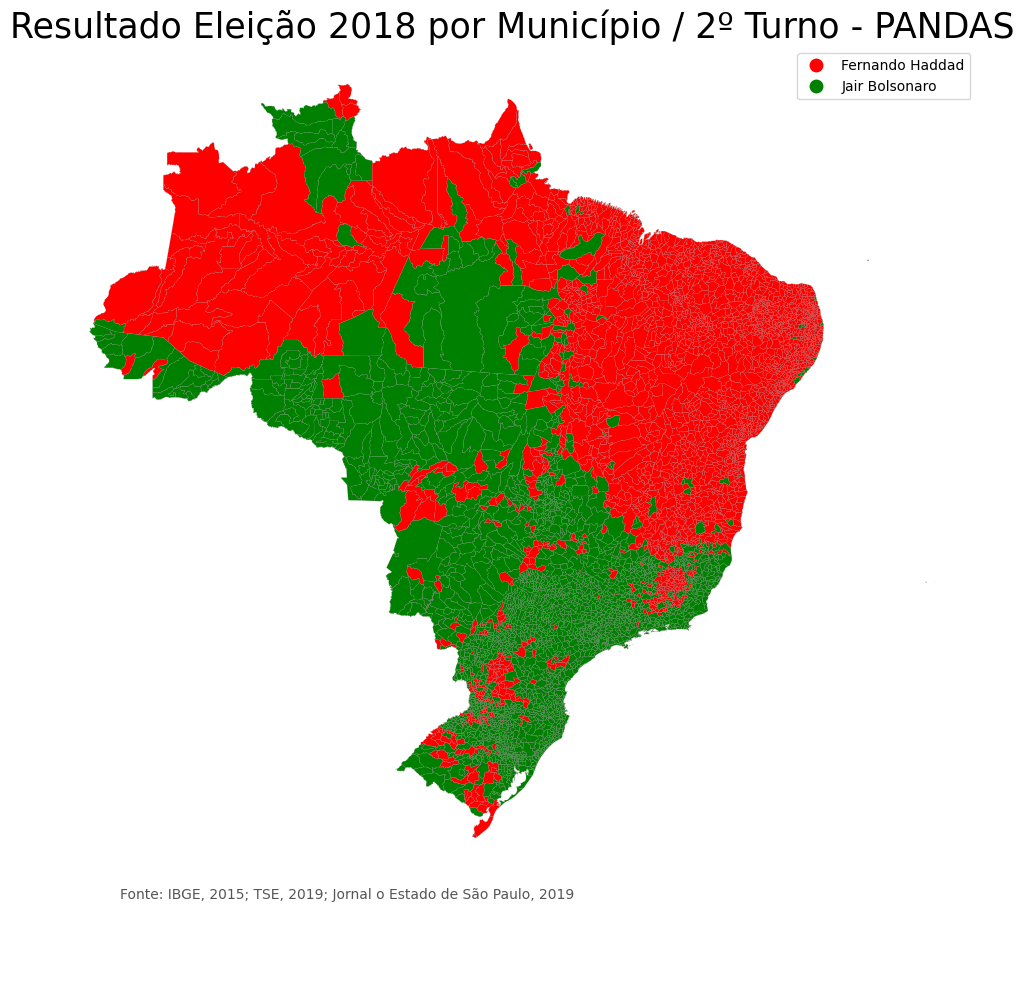

In [49]:
# Vamos desenhar o mapa

# Criar a referência para o código de cor (False/0 = red, True/1 = green)
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['red', 'green'])

# Desenhando o mapa
fig, ax = plt.subplots(1, figsize=(12, 12))

ax = df_mapa_novo.plot(column='RESULTADO', cmap=cmap, legend=True, linewidth=0.1, ax=ax,
                      edgecolor='grey')

# Escondendo o eixos
ax.set_axis_off()

# Colocando um título
ax.set_title('Resultado Eleição 2018 por Município / 2º Turno - PANDAS', fontdict={'fontsize': '25', 'fontweight': '3'})

# Criando uma nota do rodapé
ax.annotate('Fonte: IBGE, 2015; TSE, 2019; Jornal o Estado de São Paulo, 2019',
    xy=(0.1, 0.08), xycoords='figure fraction', horizontalalignment='left',
    verticalalignment='top', fontsize=10, color='#555555')

# Alterando a legenda
leg = ax.get_legend()
leg.get_texts()[0].set_text('Fernando Haddad')
leg.get_texts()[1].set_text('Jair Bolsonaro')

plt.show()